In [12]:
import sys
sys.path.append('../models_new')

import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from sklearn.preprocessing import StandardScaler

import model_utils as util
from construct_model_matrices import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [13]:
DATA_DIR = '../../data/Xy_internal_split_data'

In [14]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_2003.csv', 'X_train_2009.csv'] 
  ['y_train_2003.csv', 'y_train_2009.csv']
Valid:
  ['X_valid_2003.csv', 'X_valid_2009.csv'] 
  ['y_valid_2003.csv', 'y_valid_2009.csv']
Test:
  ['X_test_2003.csv', 'X_test_2009.csv'] 
  ['y_test_2003.csv', 'y_test_2009.csv']
Loading data from ['X_train_2003.csv', 'X_train_2009.csv']...
Loading data from ['X_valid_2003.csv', 'X_valid_2009.csv']...
Loading data from ['X_test_2003.csv', 'X_test_2009.csv']...
Loading data from ['y_train_2003.csv', 'y_train_2009.csv']...
Loading data from ['y_valid_2003.csv', 'y_valid_2009.csv']...
Loading data from ['y_test_2003.csv', 'y_test_2009.csv']...
Attempting to fill NAs with average of neighboring cells.
Could not fill density for 6 rows.
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Attempting to fill NAs with average of neighboring cells.
Could not fill density for 28 rows.
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Attempting to fill NAs wit

In [15]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [16]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (52898, 231)
 y: (52904, 1)
Valid:
 X: (40128, 231)
 y: (40156, 1)
Test:
 X: (17086, 231)
 y: (17104, 1)


In [17]:
predictors = list(X_train)

In [18]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:


In [19]:
max(X_test.x), max(X_test.y)

(195, 360)

In [20]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,summerP1:PcumOctSep,summerP1:PPT,summerP2:Pmean,summerP2:PPT,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT
0,37,69,-119.110980,35.837349,141,0,0,0,0.0,685.590759,...,0.0,0.0,71.246358,8313.731294,1274.712659,2384.219847,10727.534453,33059.173593,148746.108359,278214.404698
1,38,69,-119.003126,35.859120,194,0,0,1,0.0,6174.752441,...,0.0,0.0,87.973222,10877.875727,1495.543933,2667.459467,12075.598338,40849.047960,184923.783018,329830.963074
2,39,69,-118.895219,35.880769,292,0,0,1,0.0,7538.154297,...,0.0,0.0,109.357355,14074.139083,1768.376840,3059.531818,13847.487076,50284.329646,227587.633142,393757.478054
3,40,69,-118.787258,35.902297,635,0,0,1,0.0,10577.365234,...,0.0,0.0,159.414539,20005.629382,2353.903810,4064.747016,17891.767901,67110.931910,295401.709572,510102.924386
4,41,69,-118.679245,35.923705,1250,1,1,1,38.0,41283.019531,...,0.0,0.0,268.615209,30930.918463,3727.077521,6608.496303,27649.504627,102576.042767,429171.272713,760965.328241


In [21]:
density_matrix_train = util.column2matrix(X_train, 'density', cell_dim=1)
density_matrix_valid = util.column2matrix(X_valid, 'density', cell_dim=1)
density_matrix_test  = util.column2matrix(X_test,  'density', cell_dim=1)

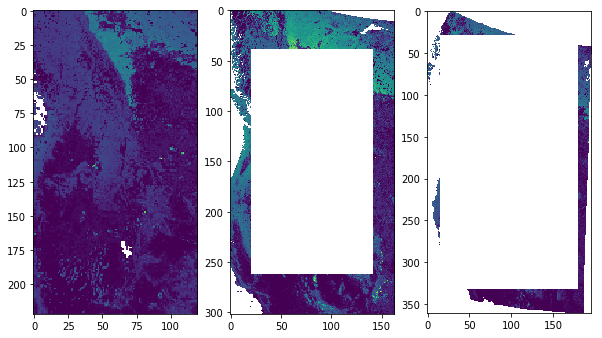

In [22]:
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [23]:
btl_matrix_train = util.column2matrix(X_train, 'btl_t1', cell_dim=1)
btl_matrix_valid = util.column2matrix(X_valid, 'btl_t1', cell_dim=1)
btl_matrix_test  = util.column2matrix(X_test,  'btl_t1', cell_dim=1)

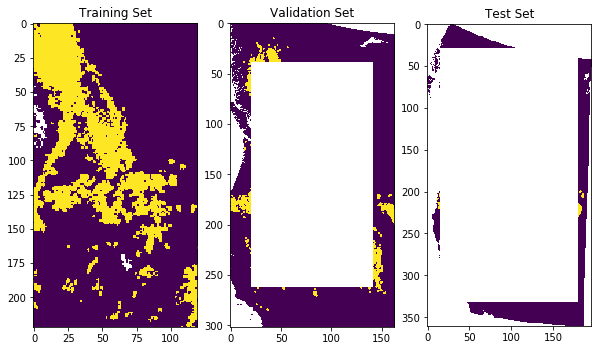

In [25]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [26]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [27]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 